In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data =pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
from sklearn.preprocessing import StandardScaler
std_scaling= StandardScaler()
std_scaling.fit(data.drop('Type',axis=1))

StandardScaler()

In [6]:
std_scaled=std_scaling.transform(data.drop('Type',axis=1))

# making DataFrame
scaled_data = pd.DataFrame(std_scaled,columns=data.columns[:-1])
# scaled_data

In [7]:
scaled_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,data['Type'],test_size=0.2)

In [9]:
#knn algo.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)

In [10]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_test,y_pred )

array([[8, 3, 0, 0, 0, 0],
       [5, 9, 0, 1, 0, 0],
       [4, 2, 0, 0, 0, 0],
       [0, 3, 0, 1, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [2, 0, 0, 0, 0, 3]], dtype=int64)

In [11]:
accuracy_score(y_test , y_pred)

0.5348837209302325

In [12]:
error_rate=[]
for i in range(1,40):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.33, 0.35, 0.35, 0.4, 0.47, 0.44, 0.51, 0.49, 0.49, 0.47, 0.49, 0.44, 0.47, 0.47, 0.47, 0.47, 0.44, 0.47, 0.47, 0.44, 0.47, 0.49, 0.44, 0.49, 0.47, 0.49, 0.47, 0.47, 0.49, 0.49, 0.49, 0.49, 0.49, 0.47, 0.47, 0.47, 0.49, 0.49, 0.49]


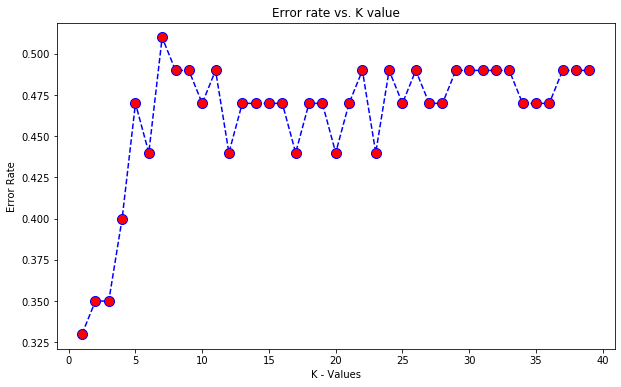

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.title('Error rate vs. K value')
plt.show()

#  without  split Data_set

In [14]:
array = data.values
X = array[:, 0:9]
X

Y = array[:, 9]
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [15]:
from sklearn.model_selection import KFold , cross_val_score
kfold = KFold(n_splits=10)

In [16]:
model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model, X, Y, cv=kfold)

In [17]:
results.mean()

0.43787878787878787

#  using   split Data_set

In [20]:
model_1 = KNeighborsClassifier(n_neighbors=15)
results_1 = cross_val_score(model_1, x_train, y_train, cv=kfold)

In [21]:
results_1.mean()

0.5895424836601306

# GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

In [24]:
n_neighbors1 = np.array(range(1,80))
param_grid = dict(n_neighbors=n_neighbors1)

In [25]:
model_2 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_2, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [26]:
print(grid.best_score_)

0.640531561461794


In [27]:
print(grid.best_params_)

{'n_neighbors': 1}


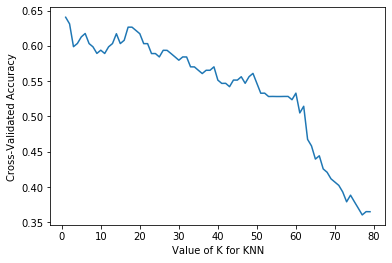

In [28]:
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
# choose k between 1 to 80
k_range = range(1, 80)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [29]:
k_scores

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124,
 0.5937984496124031,
 0.5891472868217054,
 0.5985603543743079,
 0.6032115171650055,
 0.6171650055370985,
 0.6032115171650055,
 0.6078626799557032,
 0.626467331118494,
 0.626467331118494,
 0.6218161683277963,
 0.6171650055370985,
 0.6031007751937983,
 0.6031007751937983,
 0.5890365448504984,
 0.5890365448504984,
 0.5842746400885936,
 0.5936877076411959,
 0.5935769656699889,
 0.5890365448504983,
 0.5843853820598006,
 0.5796234772978959,
 0.5842746400885935,
 0.5841638981173864,
 0.5702104097452934,
 0.5700996677740863,
 0.5653377630121815,
 0.5606866002214839,
 0.5653377630121815,
 0.5653377630121816,
 0.5702104097452934,
 0.5513842746400887,
 0.546733111849391,
 0.546843853820598,
 0.5420819490586932,
 0.5514950166112957,
 0.5513842746400887,
 0.5561461794019934,
 0.546843853820598,
 0.5562569213732005,
